## Table of contents
#### Step 1: Importing libraries and data
#### Step 2: Creating a subset
#### Step 3: Correlation matrix heatmap (colored)
#### Step 4: Scatterplots for the variables with the strongest correlations
#### Step 5: Pair plot of the entire data set
#### Step 6.1: Categorical plot 
#### Step 6.2: Creating an additional column and exporting dataframe
#### Step 7: Questions and answers
#### Step 8: Defining hypotheses

## Step 1: Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.7.0'

In [2]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Importing data file by creating a path 

path = r'C:\Users\Lenovo\Documents\Eva\Achievement 6'
df = pd.read_csv(os.path.join(path, 'Project Achievement 6 Tornado_clean.csv'), index_col = False)

In [4]:
df.head()

Unnamed: 0  Year  Month  Day        Date State  Magnitude  Injuries  \
0           0  1950      1    3  03.01.1950    IL        3.0         3   
1           1  1950      1    3  03.01.1950    MO        3.0         3   
2           2  1950      1    3  03.01.1950    OH        1.0         1   
3           3  1950      1   13  13.01.1950    AR        3.0         1   
4           4  1950      1   25  25.01.1950    IL        2.0         0   

   Fatalities  Starting latitude  Starting longitude  Ending latitude  \
0           0              39.10              -89.30            39.12   
1           0              38.77              -90.22            38.83   
2           0              40.88              -84.58              NaN   
3           1              34.40              -94.37              NaN   
4           0              41.17              -87.33              NaN   

   Ending longitude  Length of track  Width   
0            -89.23              3.6     130  
1            -90.03              9.5     150  
2               NaN              0.1      10  
3               NaN              0.6      17  
4               NaN              0.1     100

## Step 2: Creating a subset

In [7]:
# Creating a subset only with columns relevant for correlations

sub = df[['Injuries', 'Fatalities', 'Starting latitude', 'Starting longitude', 'Ending latitude', 'Ending longitude', 'Length of track', 'Width ']]

In [8]:
sub

Injuries  Fatalities  Starting latitude  Starting longitude  \
0             3           0            39.1000            -89.3000   
1             3           0            38.7700            -90.2200   
2             1           0            40.8800            -84.5800   
3             1           1            34.4000            -94.3700   
4             0           0            41.1700            -87.3300   
...         ...         ...                ...                 ...   
67091         0           0            31.1703            -83.3804   
67092         0           0            31.6900            -82.7300   
67093         0           0            34.2875            -85.7878   
67094         0           0            33.7372            -84.9998   
67095         6           0            33.5676            -83.9877   

       Ending latitude  Ending longitude  Length of track  Width   
0              39.1200          -89.2300             3.60     130  
1              38.8300          -90.0300             9.50     150  
2                  NaN               NaN             0.10      10  
3                  NaN               NaN             0.60      17  
4                  NaN               NaN             0.10     100  
...                ...               ...              ...     ...  
67091          31.1805          -83.3453             2.19     150  
67092          31.7439          -82.5412            11.71     300  
67093          34.2998          -85.7805             0.95      50  
67094          33.7625          -84.9633             2.75     150  
67095          33.5842          -83.9498             2.50      75  

[67096 rows x 8 columns]

## Step 3: Correlation matrix heatmap (colored)

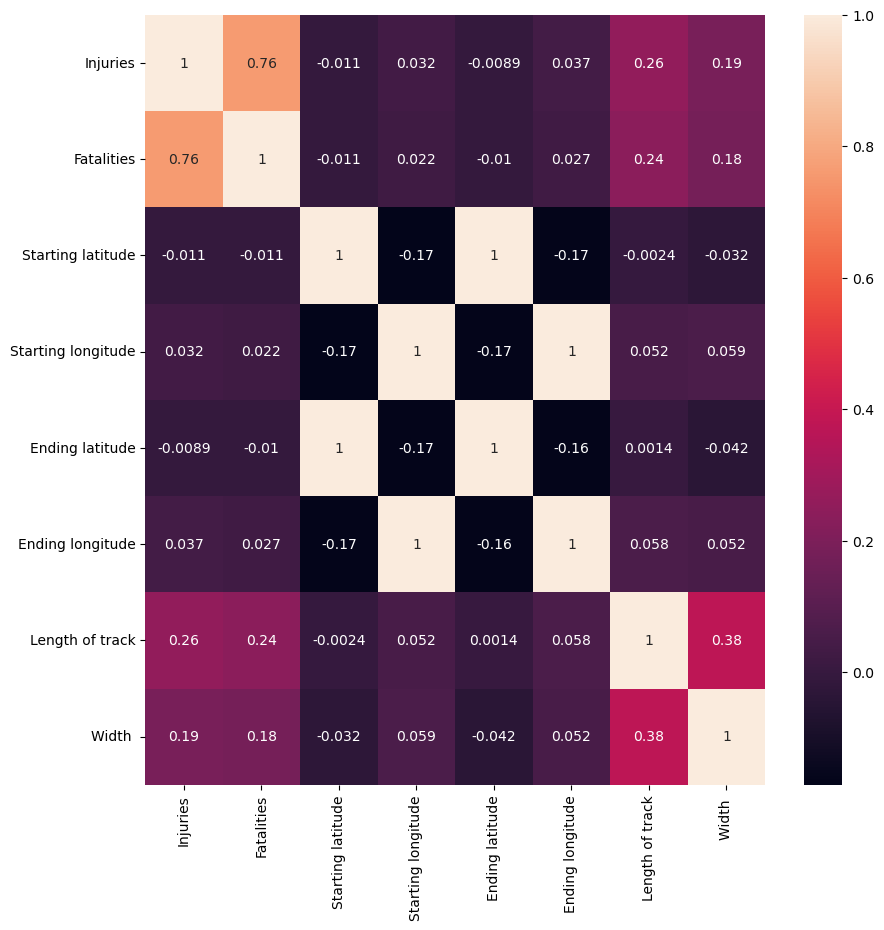

In [9]:
# Creating a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Creating the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

"Starting latitude" and "Ending latitude" as well as "Starting longitude" and "Ending longitude" are perfectly correlated (both 1.0), meaning that starting and ending point of the tornados vary only very slightly. There is a strong positive relationship between "Injuries" and "Fatalities" (0.76), meaning the more injuries there are after a tornado, the more fatalities there are. Also, we find a moderate positive correlation between "Length of track" and "Width" (0.38), meaning that the length of the track of a tornado increases, as the width of the tornado moderately increases. In addition, "Length of track" is weakly correlated with both "Injuries" (0.26) and "Fatalities" (0.24), meaning that the longer the track of the tornado, the more injuries and fatalities occur. All other correlations between variables are weak to almost non-existent. 

## Step 4: Scatterplots for the variables with the strongest correlations

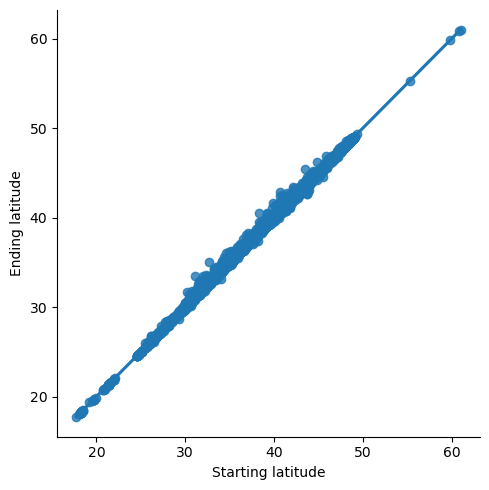

In [12]:
# Creating a scatterplot for the "Starting latitude" and "Ending latitude" columns in seaborn

sns.lmplot(x = 'Starting latitude', y = 'Ending latitude', data = df)

As mentioned above, we find a perfect linear positive relationship between "Starting latitude" and "Ending latitude" of a tornado, meaning that both locations are very similar or approximately the same.

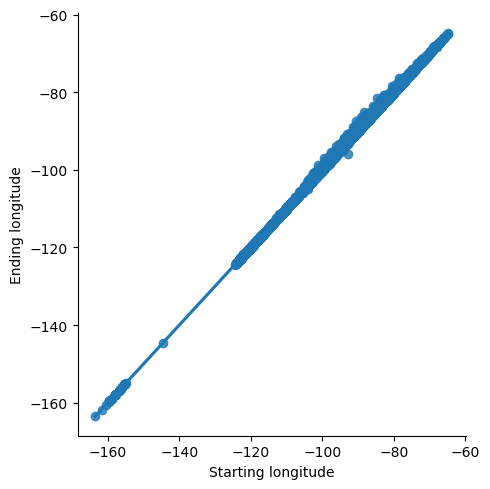

In [13]:
# Creating a scatterplot for the "Starting longitude" and "Ending longitude" columns in seaborn

sns.lmplot(x = 'Starting longitude', y = 'Ending longitude', data = df)

As mentioned above, we find a perfect linear positive relationship between "Starting longitude" and "Ending longitude" of a tornado, meaning that both locations are very similar or approximately the same.

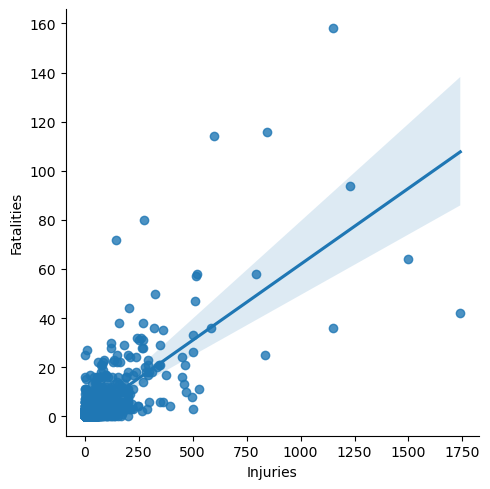

In [10]:
# Creating a scatterplot for the "Injuries" and "Fatalities" columns in seaborn

sns.lmplot(x = 'Injuries', y = 'Fatalities', data = df)

We see that most injuries and fatalities caused by a tornado are relatively small in number, clustering between 0 and 250 (injuries) as well as 0 and 20 (fatalities). Also the obersevations are relatively close to the graph line, even when injuries and fatalities increase a little more in number (to 500 and 40 respectively). However, above these values, the variance of injuries and fatalities is pretty high, with the single dots/observations being far away from the graph line. So generally, we can state (as already done above) that the higher the injuries, the higher the fatalities, but this is no perfect relationship and there are some exceptions to this, especially when the numbers of injuries and fatalities increase. 

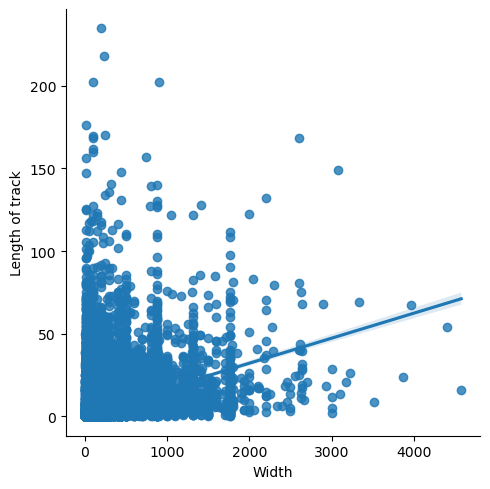

In [17]:
# Creating a scatterplot for the "Width" and "Length of track" columns in seaborn

sns.lmplot(x = 'Width', y = 'Length of track', data = df)

In this scatterplot, we can see that the relationship between length and width of a tornado is pretty.. messy. Again, there are many observations in the far left of the scatterplot, meaning tornados with small width and length. However, there are also many tornados with small width but medium to high length of track. Generally, many observations are all over the place and far way from the graph line. 

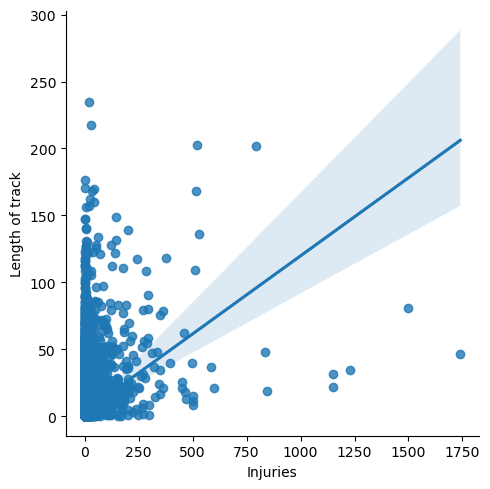

In [23]:
# Creating a scatterplot for the "Injuries" and "Length of track" columns in seaborn

sns.lmplot(x = 'Injuries', y = 'Length of track', data = df)

This scatterplot is very similar to the scatterplot above. Again, there are many observations in the far left of the scatterplot, meaning tornados with a small number of injuries and a small length, but there are also many observations where injuries are little and length of track is high. Generally, many observations are far way from the graph line.

## Step 5: Pair plot of the entire data set

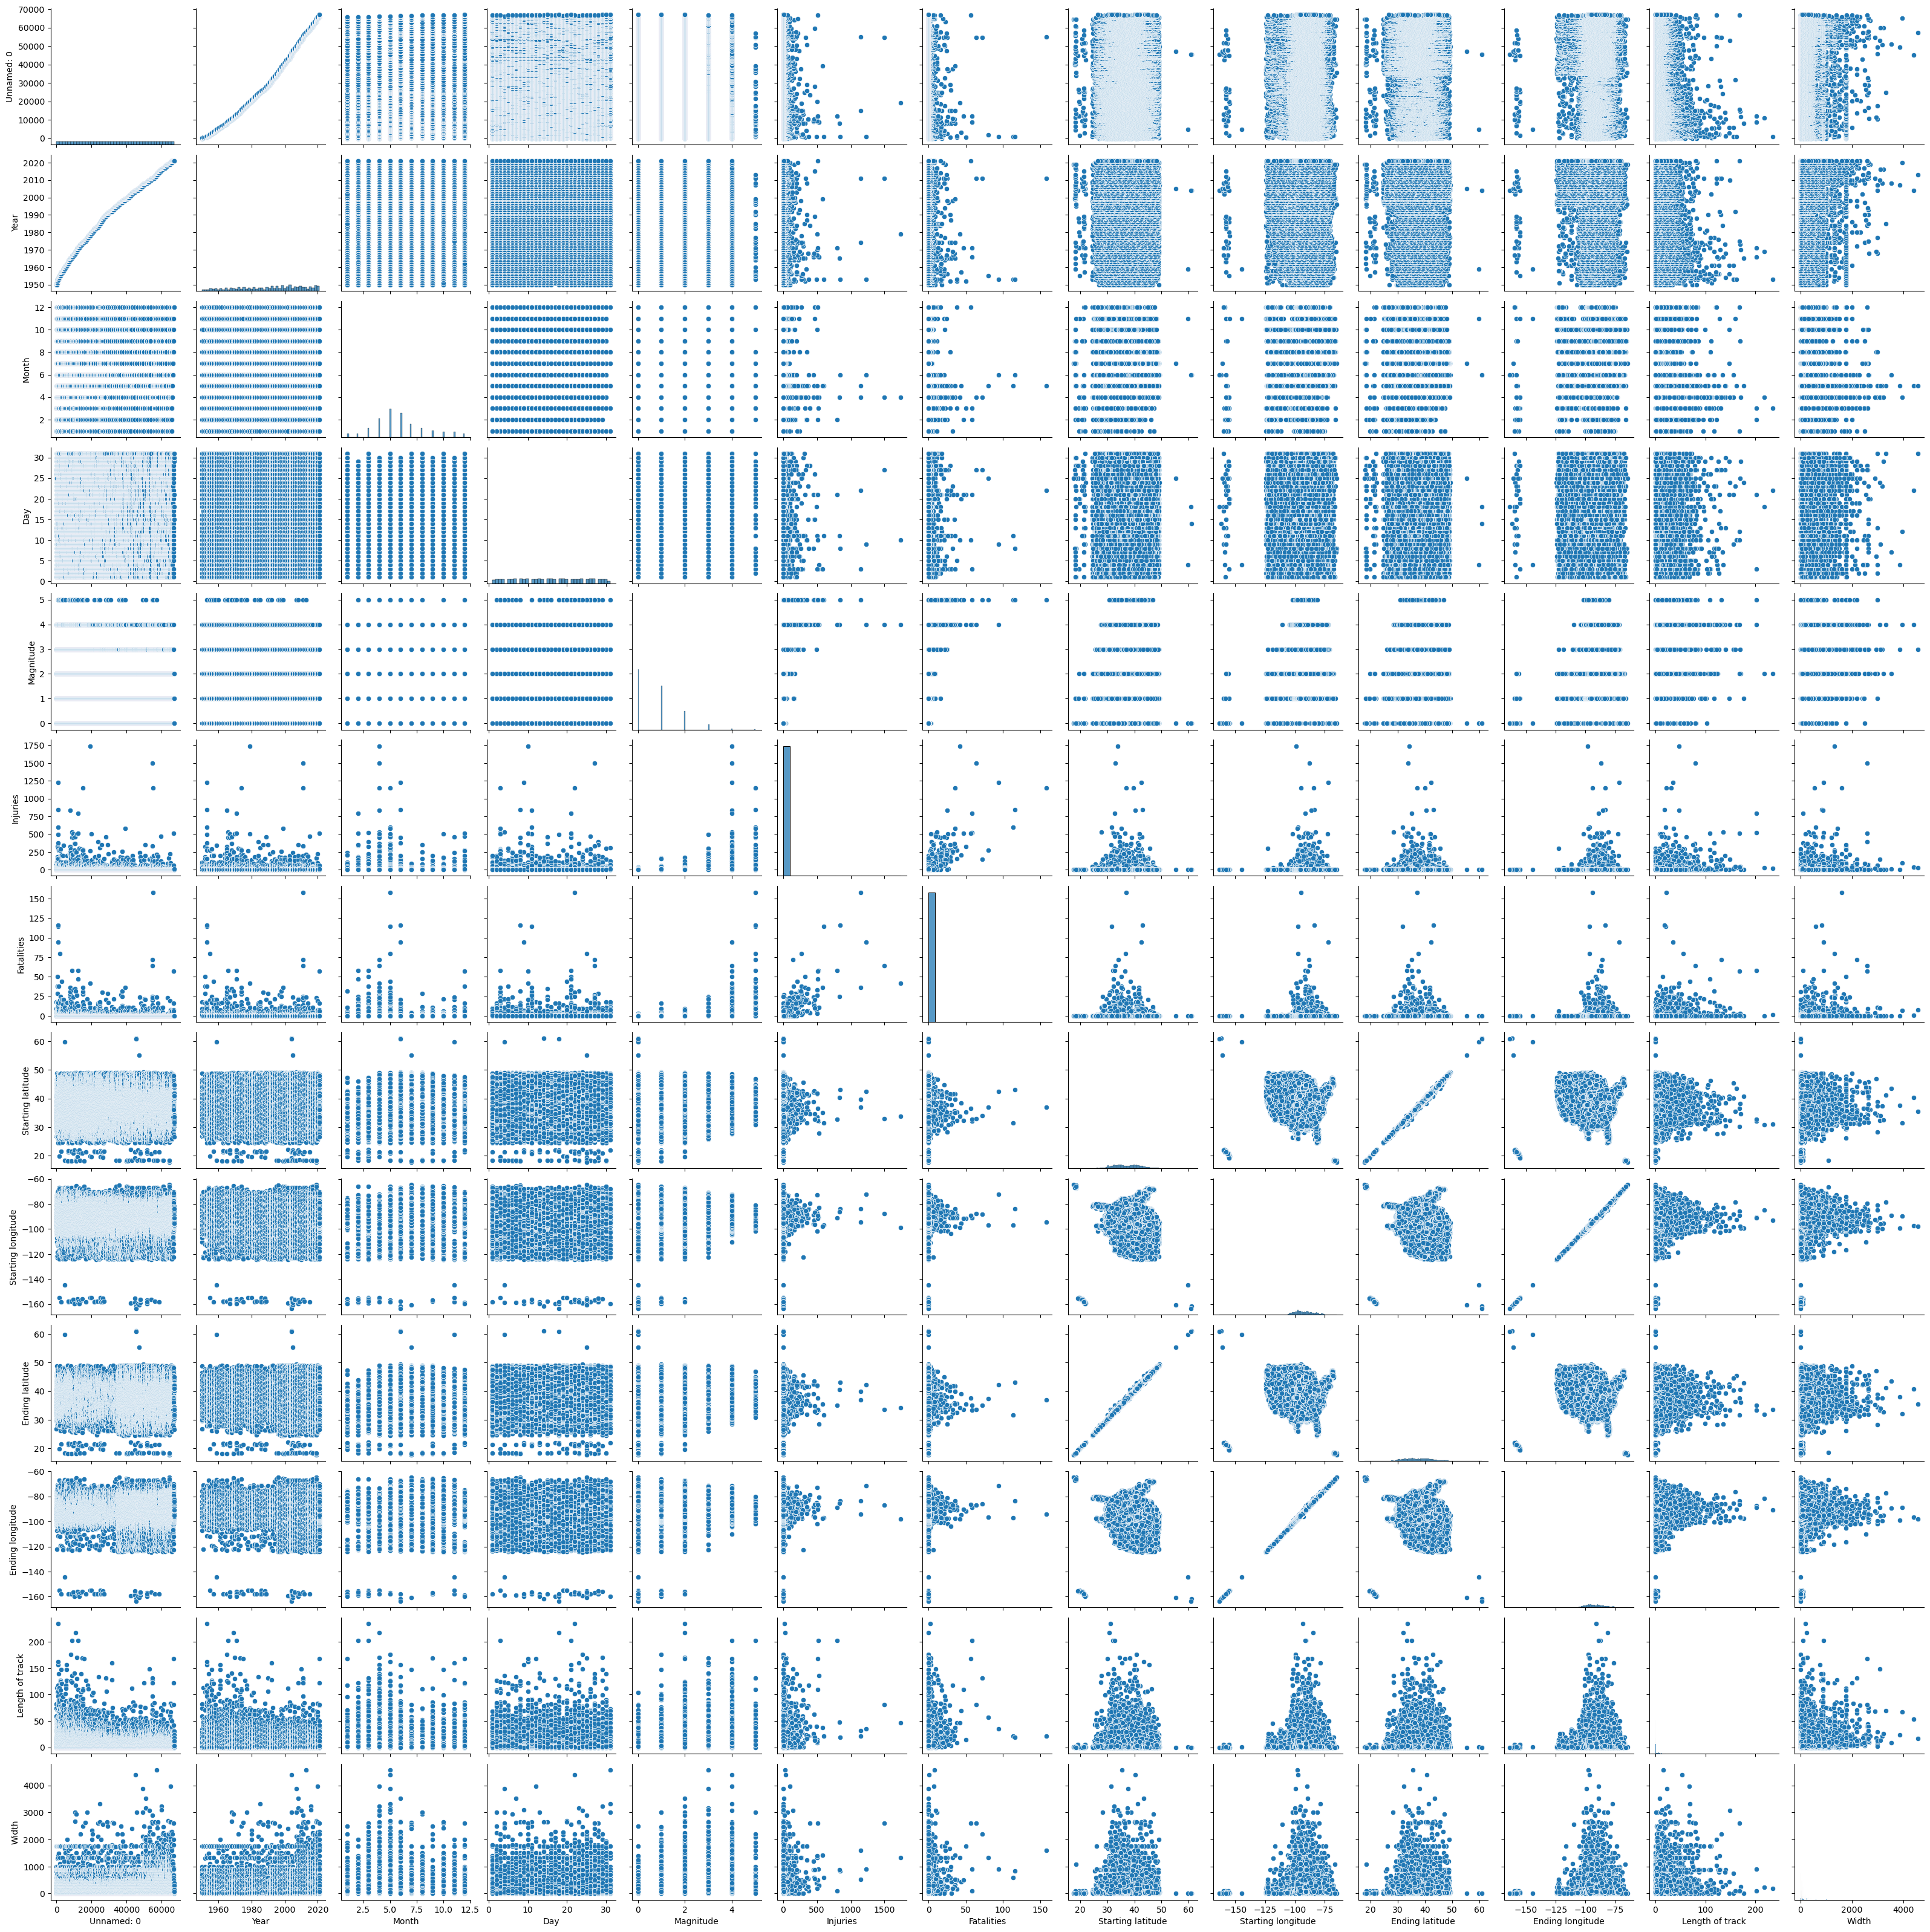

In [18]:
# Creating a pair plot 

g = sns.pairplot(df)

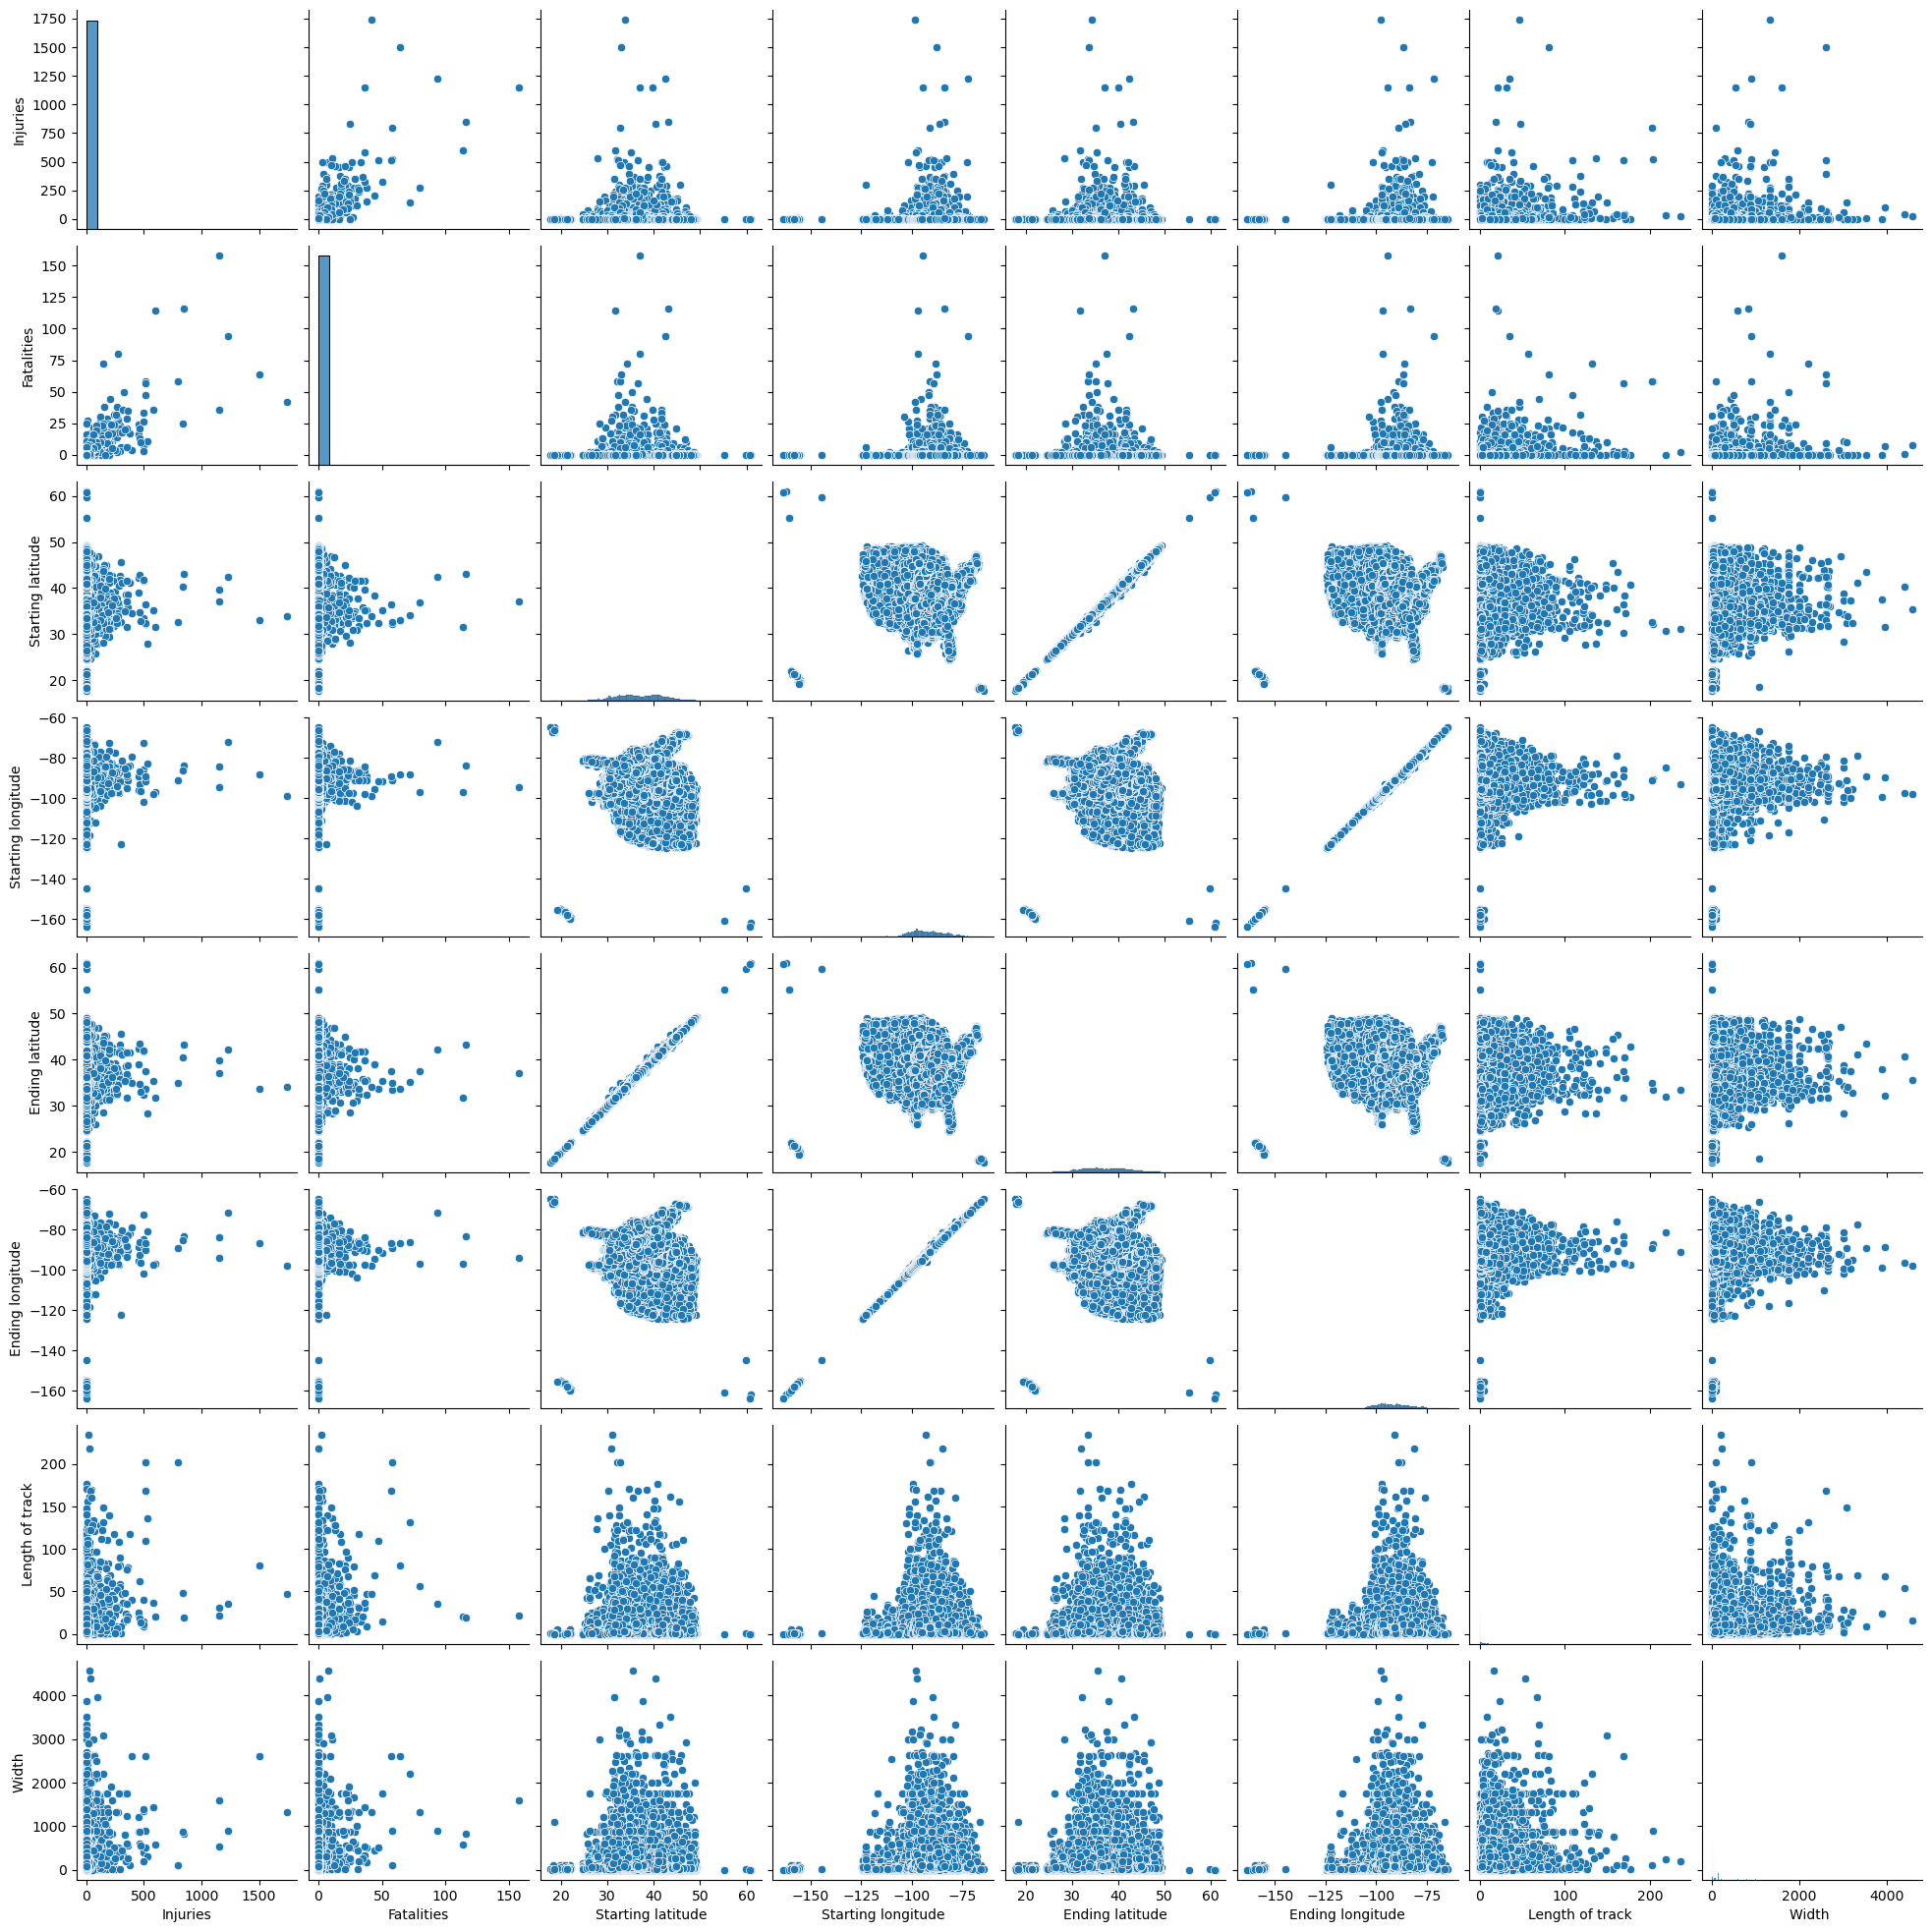

In [11]:
# The above pair plot is very confusing, so I will create a smaller one

g = sns.pairplot(sub)

I've aleady investigated a lot of the relationships between the variables in the scatterplots in step 4. All other plots show a relatively random pattern, which is consistent with the weak to non-existent correlations between these variables mentioned above. However, the above shown histograms need some further analysis, since their display is very small and thus not very clearly visible.

<Axes: xlabel='Injuries', ylabel='Count'>

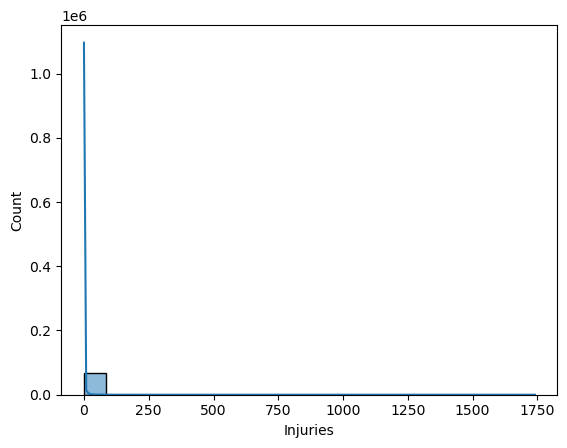

In [18]:
# Using histograms to visualize the distribution of the variables: "Injuries"

sns.histplot(df['Injuries'], bins = 20, kde = True)

We see that this distribution is heavily right-skewed and all the data points are clustered around low values. So I will create a subset to show the distribution without outliers.

In [87]:
# Subsetting

df_sub_injuries = df.loc[df['Injuries'] < 15]

<Axes: xlabel='Injuries', ylabel='Count'>

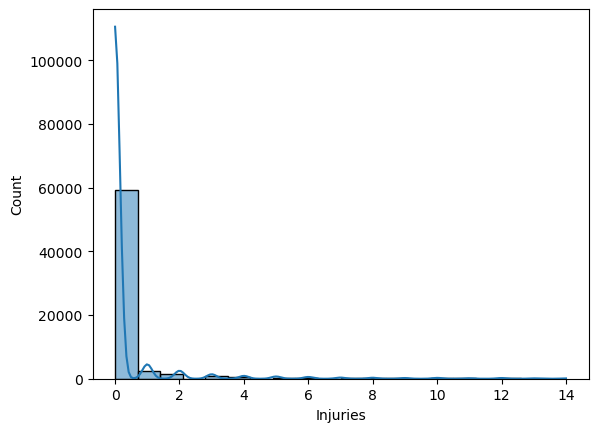

In [88]:
# Histogram of the subset

sns.histplot(df_sub_injuries['Injuries'], bins = 20, kde = True)

<Axes: xlabel='Fatalities', ylabel='Count'>

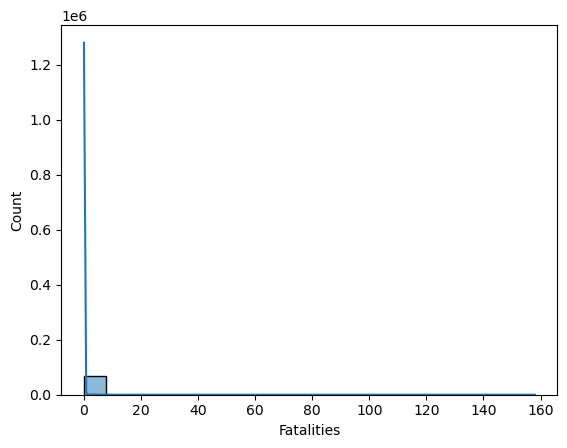

In [19]:
# Using histograms to visualize the distribution of the variables: "Fatalities"

sns.histplot(df['Fatalities'], bins = 20, kde = True)

We see that this distribution is heavily right-skewed and all the data points are clustered around low values. So I will create a subset to show the distribution again in a clearer manner.

In [96]:
# Subsetting

df_sub_fatalities = df.loc[df['Fatalities'] < 10]

<Axes: xlabel='Fatalities', ylabel='Count'>

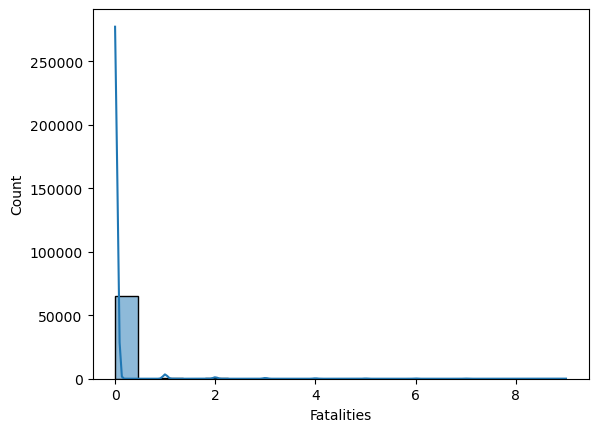

In [97]:
# Histogram of the subset

sns.histplot(df_sub_fatalities['Fatalities'], bins = 20, kde = True)

<Axes: xlabel='Length of track', ylabel='Count'>

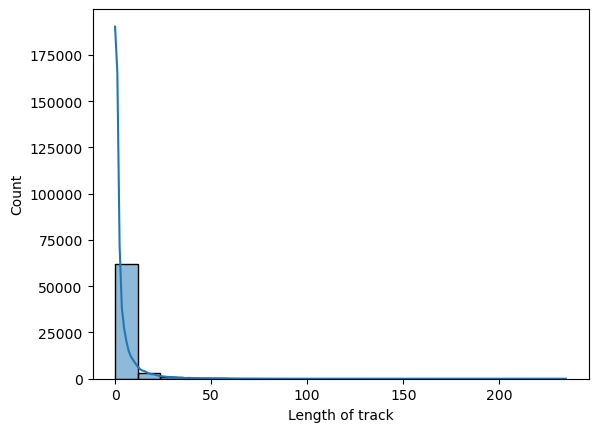

In [20]:
# Using histograms to visualize the distribution of the variables: "Length of track"

sns.histplot(df['Length of track'], bins = 20, kde = True)

We see that this distribution is heavily right-skewed and all the data points are clustered around low values. So I will create a subset to show the distribution without outliers.

In [89]:
# Subsetting

df_sub_length = df.loc[df['Length of track'] < 50]

<Axes: xlabel='Length of track', ylabel='Count'>

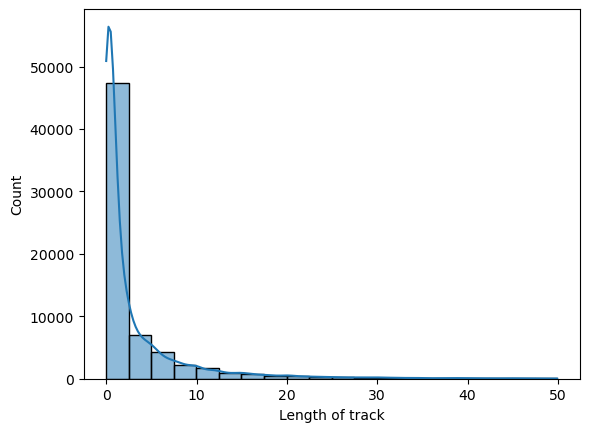

In [90]:
# Histogram of the subset

sns.histplot(df_sub_length['Length of track'], bins = 20, kde = True)

<Axes: xlabel='Width ', ylabel='Count'>

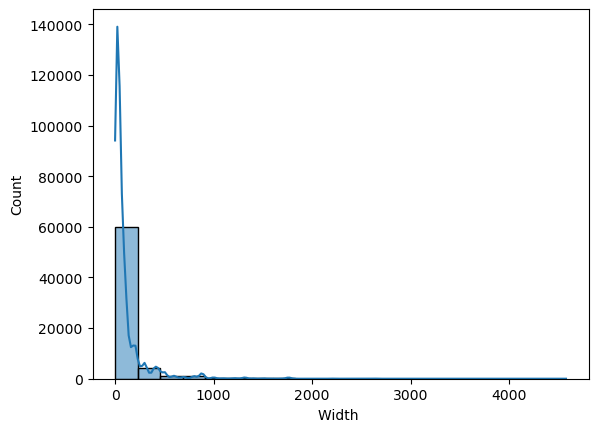

In [21]:
# Using histograms to visualize the distribution of the variables: "Width"

sns.histplot(df['Width '], bins = 20, kde = True)

We see that this distribution is heavily right-skewed and all the data points are clustered around low values. So I will create a subset to show the distribution without outliers.

In [99]:
# Subsetting

df_sub_width = df.loc[df['Width '] < 1000]

<Axes: xlabel='Width ', ylabel='Count'>

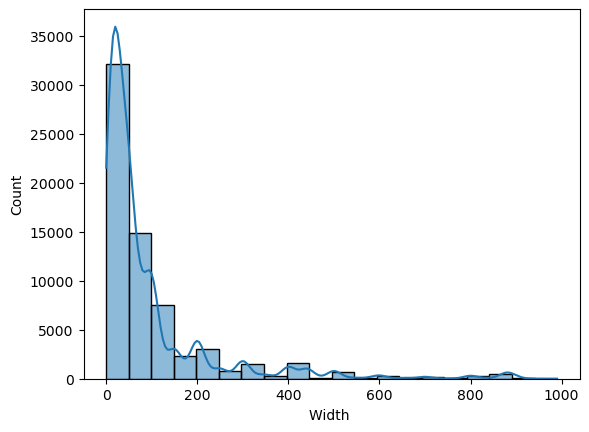

In [100]:
# Histogram of the subset

sns.histplot(df_sub_width['Width '], bins = 20, kde = True)

## Step 6.1: Categorical plot 

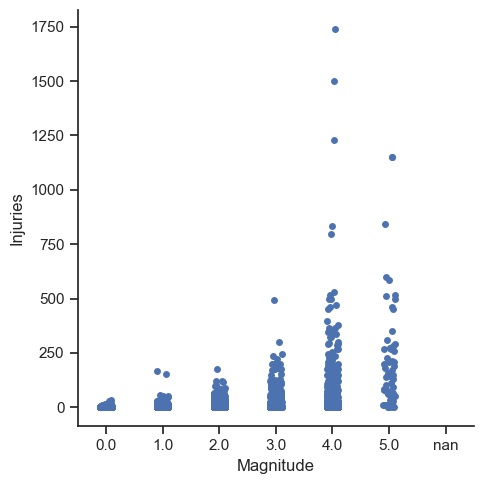

In [25]:
# Creating a categorical plot in seaborn using "Magnitude" und "Injuries"

sns.set(style="ticks")
g = sns.catplot(x="Magnitude", y="Injuries", data=df)

The categorical plot shows us that there are more injuries caused by a tornado when that tornado has a higher magnitude (4.0 or 5.0) compared to a lower magnitude.

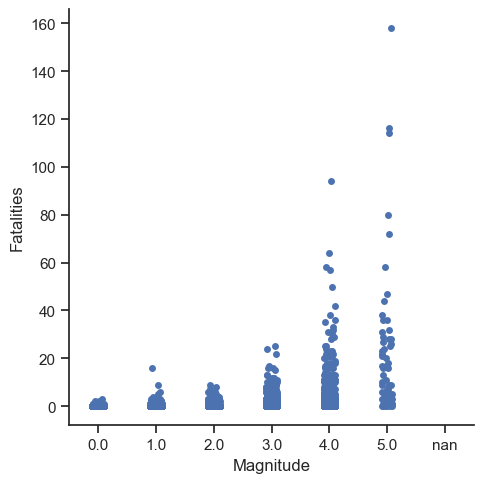

In [27]:
# Creating a categorical plot in seaborn using "Magnitude" and "Fatalities"

sns.set(style="ticks")
g = sns.catplot(x="Magnitude", y="Fatalities", data=df)

The categorical plot shows us that there are more fatalities caused by a tornado when that tornado has a higher magnitude (4.0 or 5.0) compared to a lower magnitude.

## Step 6.2: Creating an additional column and exporting dataframe

In [5]:
# Creating an additional column named "State name" from the column "State" with the abbreviated names

df.loc[df['State'] == 'AL', 'State name'] = 'Alabama'

In [6]:
df.loc[df['State'] == 'AK', 'State name'] = 'Alaska'

In [7]:
df.loc[df['State'] == 'AZ', 'State name'] = 'Arizona'

In [8]:
df.loc[df['State'] == 'AR', 'State name'] = 'Arkansas'

In [9]:
df.loc[df['State'] == 'CA', 'State name'] = 'California'

In [10]:
df.loc[df['State'] == 'CO', 'State name'] = 'Colorado'

In [11]:
df.loc[df['State'] == 'CT', 'State name'] = 'Connecticut'

In [12]:
df.loc[df['State'] == 'DE', 'State name'] = 'Delaware'

In [13]:
df.loc[df['State'] == 'DC', 'State name'] = 'District of Columbia'

In [14]:
df.loc[df['State'] == 'FL', 'State name'] = 'Florida'

In [15]:
df.loc[df['State'] == 'GA', 'State name'] = 'Georgia'

In [16]:
df.loc[df['State'] == 'HI', 'State name'] = 'Hawaii'

In [17]:
df.loc[df['State'] == 'ID', 'State name'] = 'Idaho'

In [18]:
df.loc[df['State'] == 'IL', 'State name'] = 'Illinois'

In [19]:
df.loc[df['State'] == 'IN', 'State name'] = 'Indiana'

In [20]:
df.loc[df['State'] == 'IA', 'State name'] = 'Iowa'

In [21]:
df.loc[df['State'] == 'KS', 'State name'] = 'Kansas'

In [22]:
df.loc[df['State'] == 'KY', 'State name'] = 'Kentucky'

In [23]:
df.loc[df['State'] == 'LA', 'State name'] = 'Louisiana'

In [24]:
df.loc[df['State'] == 'ME', 'State name'] = 'Maine'

In [25]:
df.loc[df['State'] == 'MD', 'State name'] = 'Maryland'

In [26]:
df.loc[df['State'] == 'MA', 'State name'] = 'Massachussets'

In [27]:
df.loc[df['State'] == 'MI', 'State name'] = 'Michigan'

In [28]:
df.loc[df['State'] == 'MN', 'State name'] = 'Minnesota'

In [29]:
df.loc[df['State'] == 'MS', 'State name'] = 'Mississippi'

In [30]:
df.loc[df['State'] == 'MO', 'State name'] = 'Missouri'

In [31]:
df.loc[df['State'] == 'MT', 'State name'] = 'Montana'

In [32]:
df.loc[df['State'] == 'NE', 'State name'] = 'Nebraska'

In [33]:
df.loc[df['State'] == 'NV', 'State name'] = 'Nevada'

In [34]:
df.loc[df['State'] == 'NH', 'State name'] = 'New Hampshire'

In [35]:
df.loc[df['State'] == 'NJ', 'State name'] = 'New Jersey'

In [36]:
df.loc[df['State'] == 'NM', 'State name'] = 'New Mexico'

In [37]:
df.loc[df['State'] == 'NY', 'State name'] = 'New York'

In [38]:
df.loc[df['State'] == 'NC', 'State name'] = 'North Carolina'

In [39]:
df.loc[df['State'] == 'ND', 'State name'] = 'North Dakota'

In [40]:
df.loc[df['State'] == 'OH', 'State name'] = 'Ohio'

In [41]:
df.loc[df['State'] == 'OK', 'State name'] = 'Oklahoma'

In [42]:
df.loc[df['State'] == 'OR', 'State name'] = 'Oregon'

In [43]:
df.loc[df['State'] == 'PA', 'State name'] = 'Pennsylvania'

In [44]:
df.loc[df['State'] == 'PR', 'State name'] = 'Puerto Rico'

In [45]:
df.loc[df['State'] == 'RI', 'State name'] = 'Rhode Island'

In [46]:
df.loc[df['State'] == 'SC', 'State name'] = 'South Carolina'

In [47]:
df.loc[df['State'] == 'SD', 'State name'] = 'South Dakota'

In [48]:
df.loc[df['State'] == 'TN', 'State name'] = 'Tennessee'

In [49]:
df.loc[df['State'] == 'TX', 'State name'] = 'Texas'

In [72]:
df.loc[df['State'] == 'UT', 'State name'] = 'Utah'

In [73]:
df.loc[df['State'] == 'VI', 'State name'] = 'Virgin Islands'

In [52]:
df.loc[df['State'] == 'VT', 'State name'] = 'Vermont'

In [53]:
df.loc[df['State'] == 'VA', 'State name'] = 'Virginia'

In [54]:
df.loc[df['State'] == 'WA', 'State name'] = 'Washington'

In [55]:
df.loc[df['State'] == 'WV', 'State name'] = 'West Virginia'

In [56]:
df.loc[df['State'] == 'WI', 'State name'] = 'Wisconsin'

In [57]:
df.loc[df['State'] == 'WY', 'State name'] = 'Wyoming'

In [58]:
# Checking the output

df.head()

Unnamed: 0  Year Month Day        Date State Magnitude Injuries Fatalities  \
0          0  1950     1   3  03.01.1950    IL       3.0        3          0   
1          1  1950     1   3  03.01.1950    MO       3.0        3          0   
2          2  1950     1   3  03.01.1950    OH       1.0        1          0   
3          3  1950     1  13  13.01.1950    AR       3.0        1          1   
4          4  1950     1  25  25.01.1950    IL       2.0        0          0   

  Starting latitude Starting longitude Ending latitude Ending longitude  \
0              39.1              -89.3           39.12           -89.23   
1             38.77             -90.22           38.83           -90.03   
2             40.88             -84.58             NaN              NaN   
3              34.4             -94.37             NaN              NaN   
4             41.17             -87.33             NaN              NaN   

  Length of track Width  State name  
0             3.6    130   Illinois  
1             9.5    150   Missouri  
2             0.1     10       Ohio  
3             0.6     17   Arkansas  
4             0.1    100   Illinois

In [74]:
# Checking for missing values in the new column "State name

df['State name'].isnull().sum()

0

In [75]:
# Exporting dataframe

df.to_csv(os.path.join(path, 'Project Achievement 6 Tornado_clean_statename.csv'))

## Step 7: Questions and answers

#### 1. At what time of the year is tornado season?
Not answered yet
#### 2. How have tornados developed over time? Are they more frequent now? Are they more severe (in terms of injuries, fatalities or magnitude?
Not answered yet
#### 3. In which states do most tornados originate? Where do they end? Have start and end changed over time?
In the previous exercise it was found that most tornados originate in Texas. The other questions cannot be answered yet. 
#### 4.	What is the typical width and length of a tornado? Do these characteristics vary with time or location?
In the previous exercise it was found that the typical tornado is rather small (width median: 50 yards = 45.72 m) and short (length of track median: 0.8 miles = 1.287 km). The other question cannot be answered yet. 
#### 5.	Does a higher magnitude lead to more injuries and/or fatalities?
That seems to be the case as shown in the categorical plot above. However, I'm not sure about the strength of the correlation since "Magnitude" is on ordinal variable and correlation can only be measured in the Spearman Correlation Coefficient for an ordinal variable.


## Step 8: Defining hypotheses

These are alternative hypotheses, formulated through some research on the topic:
#### 1. There are more tornados in spring (March, April, May) than in other seasons of the year.
#### 2. Tornados have increased in frequency over time.
#### 3. Tornados have increased in severity (in terms of magnitude) over time. 
#### 4. A higher magnitude of the tornado leads to more injuries and fatalities. 
#### 5. The number of injuries and fatalities are best explained by a combination of the following variables: magnitude, starting latitude and longitude as well as length of track. 